In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
df = pd.read_csv("census_income_learn.csv", header = None)
test = pd.read_csv('census_income_test.csv', header = None)

In [4]:
text_file = 'census_income_metadata.txt'
cols = []
with open(text_file, 'r') as lines:
    for cnt, line in enumerate(lines):
        if   68 > cnt >22:
            print(line)
            cols.append(line)   


rex_col_desc = re.compile(r'[a-z ]+')
rex_col = re.compile(r'[A-Z ]+')

cols_name = [re.findall(rex_col, x)[-1].strip() for x in cols]
cols_desc = [re.findall(rex_col_desc, x)[0].strip()for x in cols]

cols_dict = dict(zip(cols_name, cols_desc))

| age						AAGE

| class of worker				ACLSWKR

| industry code					ADTIND

| occupation code				ADTOCC

| adjusted gross income				AGI

| education					AHGA

| wage per hour					AHRSPAY

| enrolled in edu inst last wk			AHSCOL

| marital status				AMARITL

| major industry code				AMJIND

| major occupation code				AMJOCC

| mace						ARACE

| hispanic Origin				AREORGN

| sex						ASEX

| member of a labor union			AUNMEM

| reason for unemployment			AUNTYPE

| full or part time employment stat		AWKSTAT

| capital gains					CAPGAIN

| capital losses				CAPLOSS

| divdends from stocks				DIVVAL

| federal income tax liability			FEDTAX

| tax filer status				FILESTAT

| region of previous residence			GRINREG

| state of previous residence			GRINST

| detailed household and family stat		HHDFMX

| detailed household summary in household	HHDREL

| instance weight				MARSUPWT

| migration code-change in msa			MIGMTR1

| migration code-change in reg			MIGMTR3

| migration code-move within reg

In [4]:
not_in_col =['federal income tax liability',
             'instance weight', 
             'total person earnings', 
             'total person income',
             'taxable income amount']

In [5]:
check_col = []
col_level = []
x = re.compile(r'\((.*?)\)')
with open(text_file, 'r') as lines:
    for cnt, line in enumerate(lines):
        if  (80 < cnt) & (121 > cnt):
            names = re.findall(x, line)[0] 
            check_col.append(names)
check_col.append('target')

In [6]:
## df['adjusted gross income', 'target']

## Get correct column name

In [5]:
distinct_cnt =[]
col_names = []
extract_num = re.compile('\d*\d')
extract_col = re.compile('\((.*?)\)')
with open(text_file, 'r') as lines:
    for cnt, line in enumerate(lines):
        if  (80 < cnt) & (121 > cnt):
            distinct_cnt.append(re.findall(extract_num, line)[0]) 
            col_names.append(re.findall(extract_col, line)[0])
col_name_distinct_cnt = dict(zip(col_names, distinct_cnt))

In [6]:
col_distinct_value = [len(df[x].unique()) for x in df.columns]

In [7]:
column_names = col_names[:24]+['weight_instance']+col_names[24:]+['target']

df.columns = column_names
test.columns = column_names

In [8]:
d = {' - 50000.': 0,  ' 50000+.': 1}

df['target'] = df['target'].map(d).fillna(df['target'])
test['target'] = test['target'].map(d).fillna(test['target'])

In [9]:
print([x for x in cols_desc if x not in col_names])


print([x for x in col_names if x not in cols_desc])

['industry code', 'occupation code', 'adjusted gross income', 'enrolled in edu inst last wk', 'marital status', 'mace', 'hispanic', 'divdends from stocks', 'federal income tax liability', 'tax filer status', 'instance weight', 'migration code', 'migration code', 'migration code', 'live in this house', 'family members under', 'total person earnings', 'total person income', 'taxable income amount', 'fill inc questionnaire for veteran']
['detailed industry recode', 'detailed occupation recode', 'enroll in edu inst last wk', 'marital stat', 'race', 'hispanic origin', 'dividends from stocks', 'tax filer stat', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'family members under 18', "fill inc questionnaire for veteran's admin", 'year']


In [10]:
numerical_columns = df.select_dtypes(exclude=['object']).columns
categorical_columns = [x for x in df.columns if x not in numerical_columns ]

In [11]:
len([x for x in df.dtypes if( x == 'int64') | (x == 'float64')])

14

In [12]:
categorical_data = df[categorical_columns]
numerical_data = df[numerical_columns]

In [16]:
len(categorical_columns), len(numerical_columns)

(28, 14)

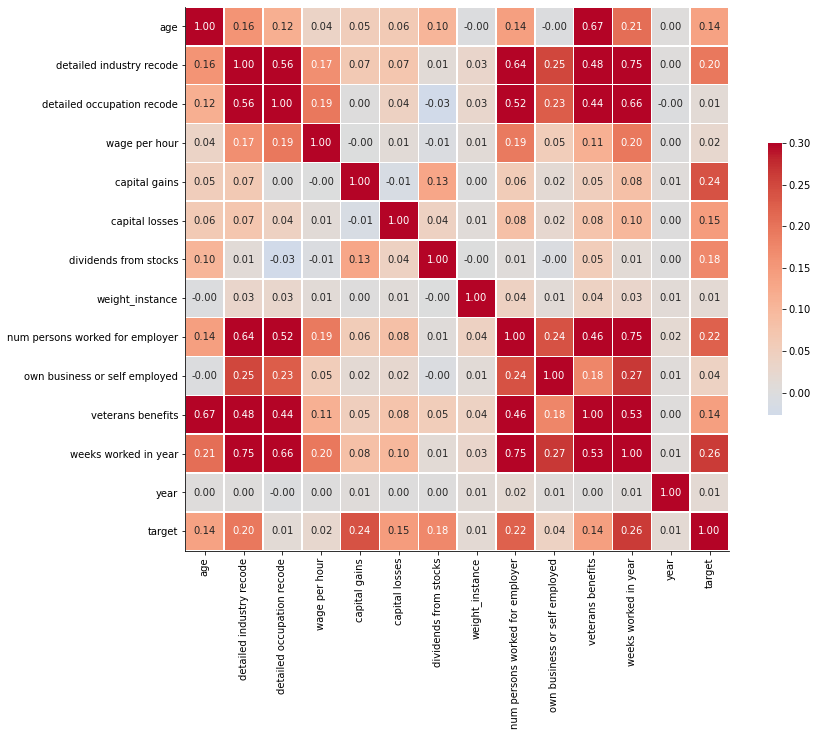

In [23]:
corr = df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)

In [130]:
#df['colour'].value_counts().plot(kind='bar')
def create_graph_num(dataframe_cols):
    fig, axes = plt.subplots(1,3, figsize=(30, 5))
    for ax, col_name in zip(axes.flatten(), dataframe_cols):
        sns.histplot(data=df, x=col_name, ax=ax,  hue = "target")
        #sns.boxenplot(data=df, x= col_name, ax=ax)

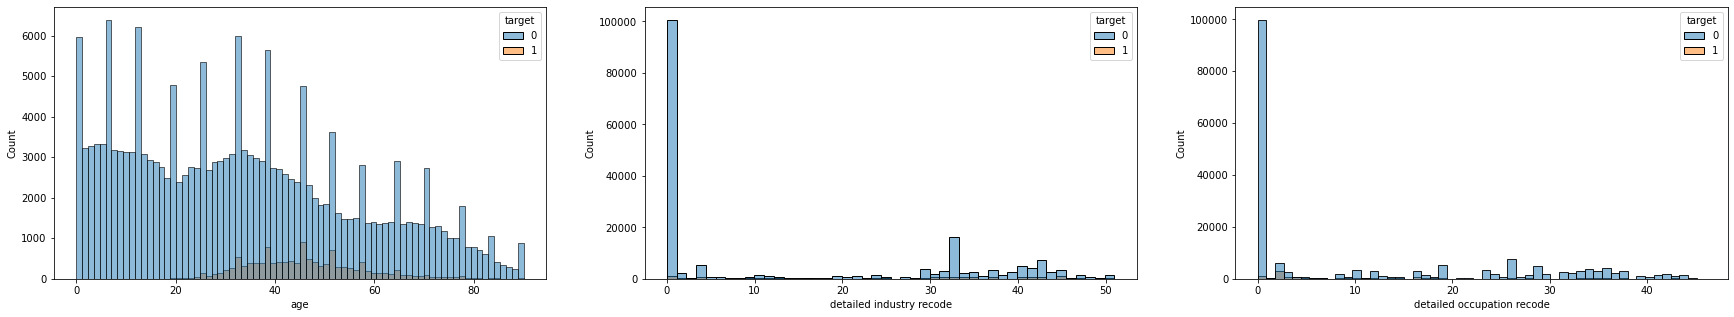

In [131]:
create_graph_num(numerical_columns[:3])

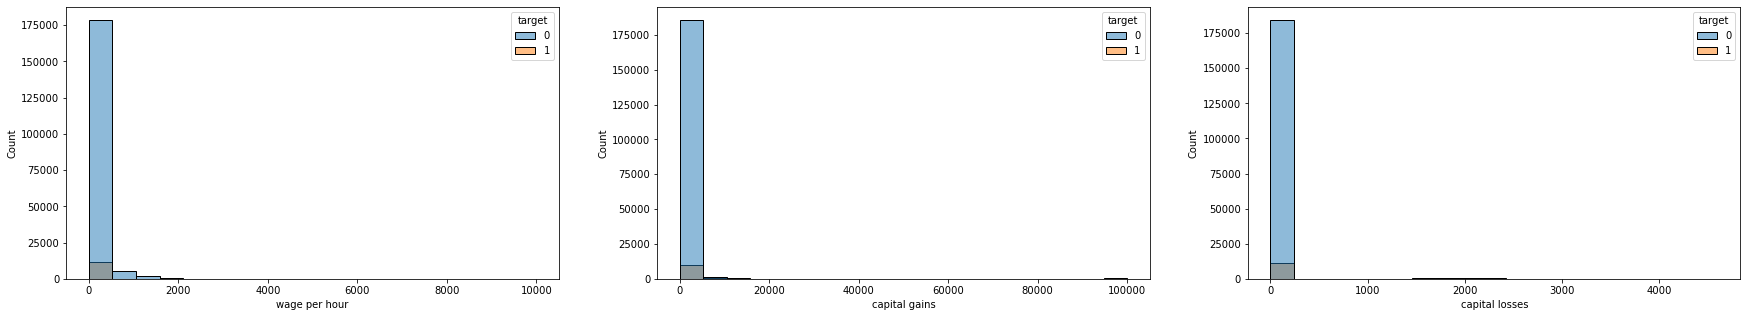

In [133]:
create_graph_num(df[numerical_columns[3:6]])

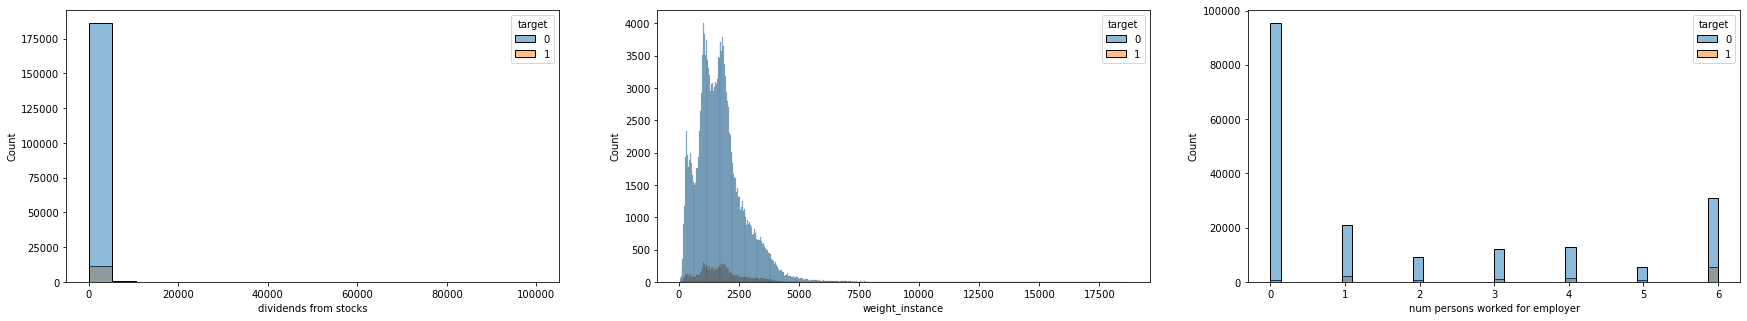

In [134]:
create_graph_num(df[numerical_columns[6:9]])

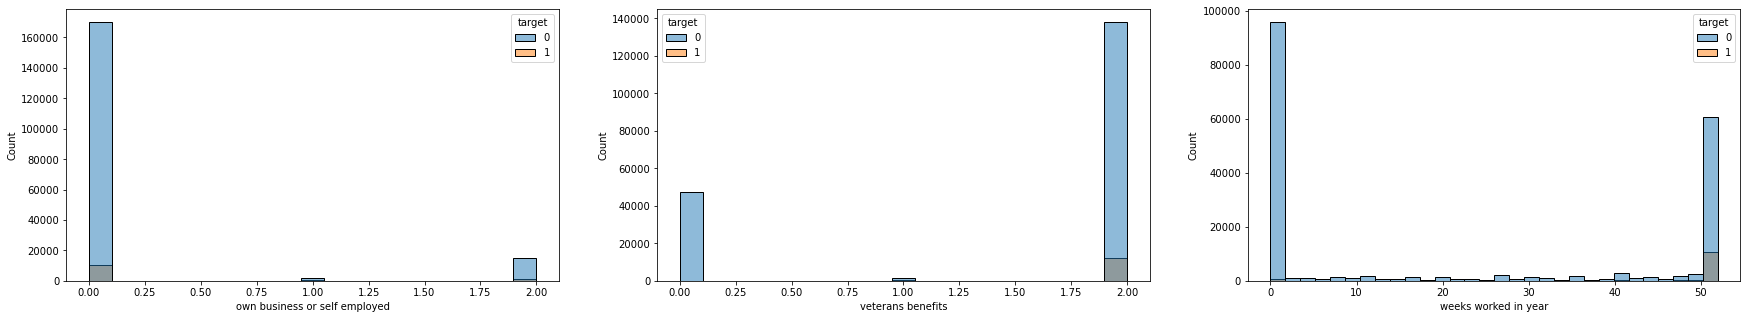

In [135]:
create_graph_num(df[numerical_columns[9:12]])

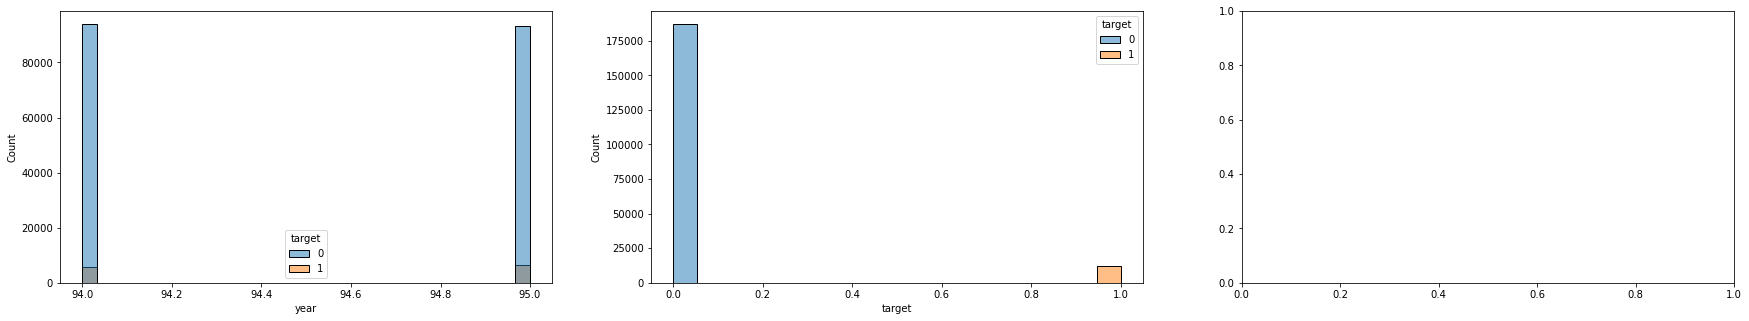

In [136]:
create_graph_num(df[numerical_columns[12:]])

<AxesSubplot:xlabel='wage per hour'>

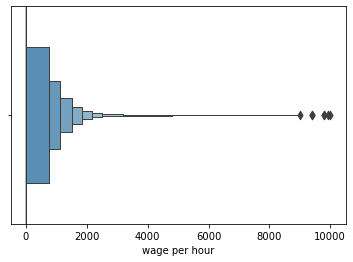

In [97]:
sns.boxenplot(x=numerical_columns[3], width=5, data = numerical_data)

In [139]:
df['country of birth father'].unique()

array([' United-States', ' Vietnam', ' Philippines', ' ?', ' Columbia',
       ' Germany', ' Mexico', ' Japan', ' Peru', ' Dominican-Republic',
       ' South Korea', ' Cuba', ' El-Salvador', ' Canada', ' Scotland',
       ' Outlying-U S (Guam USVI etc)', ' Italy', ' Guatemala',
       ' Ecuador', ' Puerto-Rico', ' Cambodia', ' China', ' Poland',
       ' Nicaragua', ' Taiwan', ' England', ' Ireland', ' Hungary',
       ' Yugoslavia', ' Trinadad&Tobago', ' Jamaica', ' Honduras',
       ' Portugal', ' Iran', ' France', ' India', ' Hong Kong', ' Haiti',
       ' Greece', ' Holand-Netherlands', ' Thailand', ' Laos', ' Panama'],
      dtype=object)

In [66]:
numerical_data['wage per hour'].value_counts()

0       188219
500        734
600        546
700        534
800        507
         ...  
743          1
584          1
170          1
1265         1
2142         1
Name: wage per hour, Length: 1240, dtype: int64

<AxesSubplot:xlabel='capital gains', ylabel='Count'>

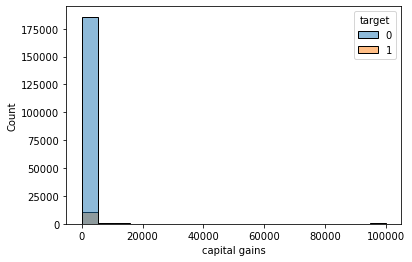

In [53]:
sns.histplot(data=df, x=numerical_columns[4],   hue = "target")

In [ ]:
create_graph_num(numerical_columns[9:12])

In [ ]:
create_graph_num(numerical_columns[12:])

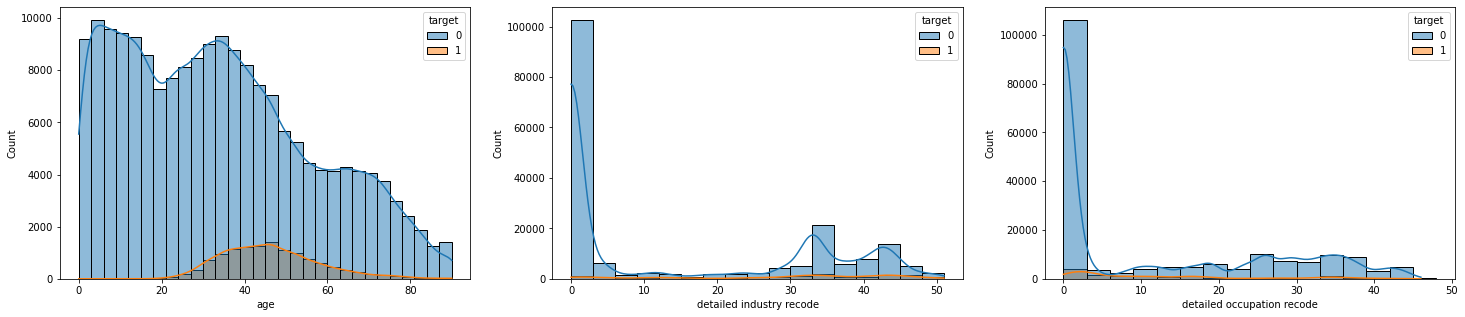

In [40]:
create_graph_num(numerical_columns[3:])

In [33]:
def create_graph_cat(dataframe_cols):
    fig, axes = plt.subplots(1,3, figsize=(25, 5))
    for ax, col_name in zip(axes.flatten(), dataframe_cols):
        x = sns.countplot(data=df, x=col_name, ax=ax)
        x.set_xticklabels(x.get_xticklabels(), rotation=90)

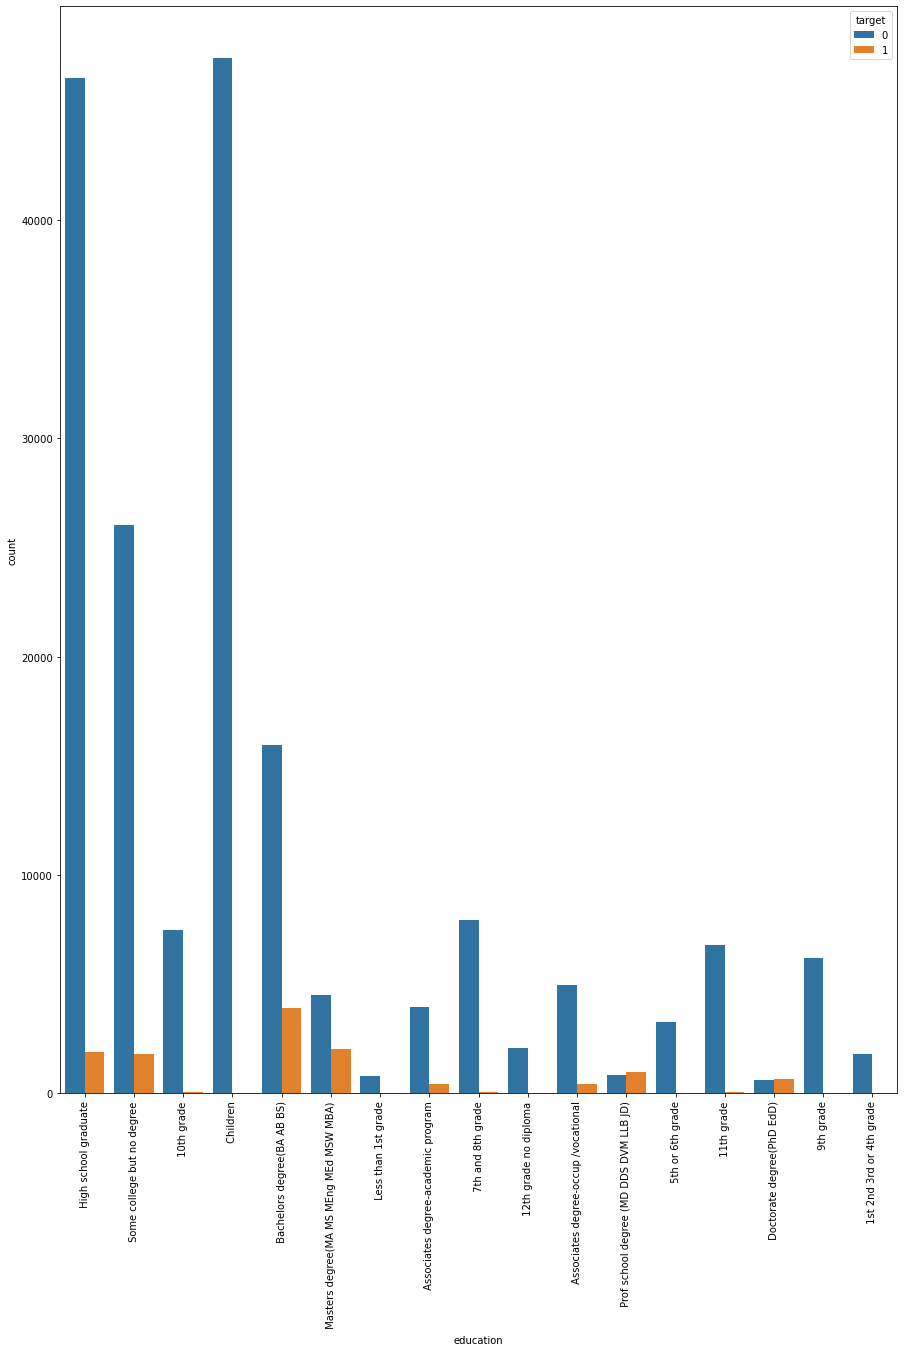

In [151]:
fig, ax = plt.subplots(figsize=(15, 20))

sns.countplot(data=df, x='education',  hue='target', ax=ax)
ax.set_xticklabels(x.get_xticklabels(), rotation=90);

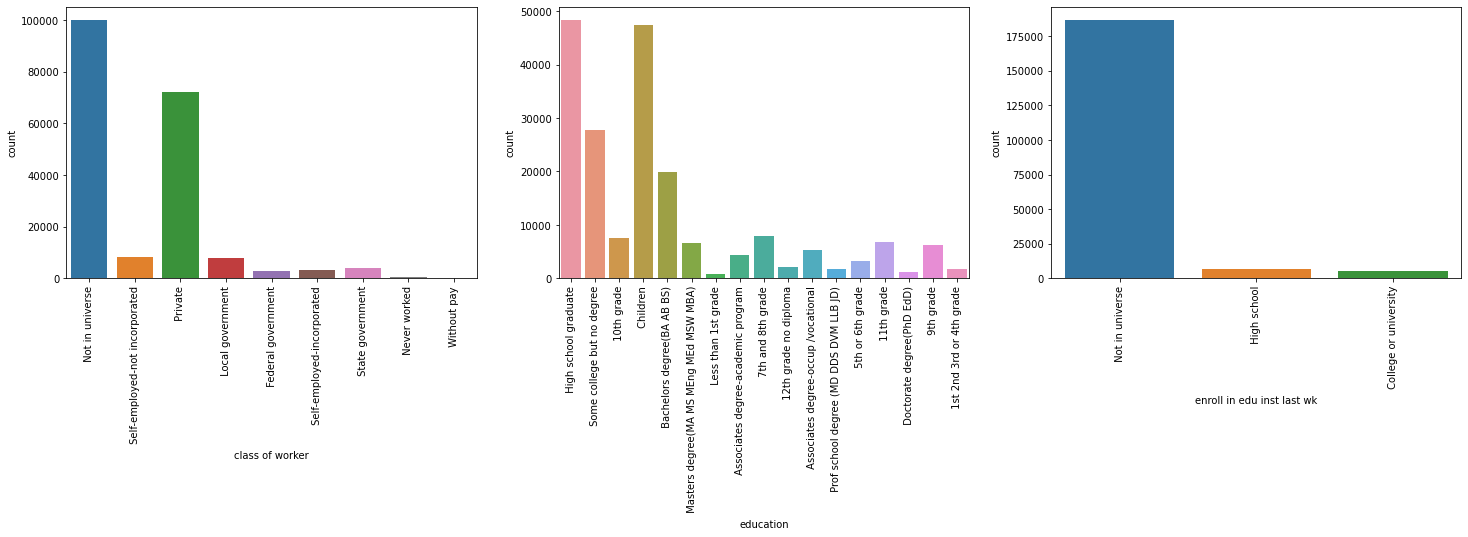

In [55]:
create_graph_cat(categorical_columns[:3])

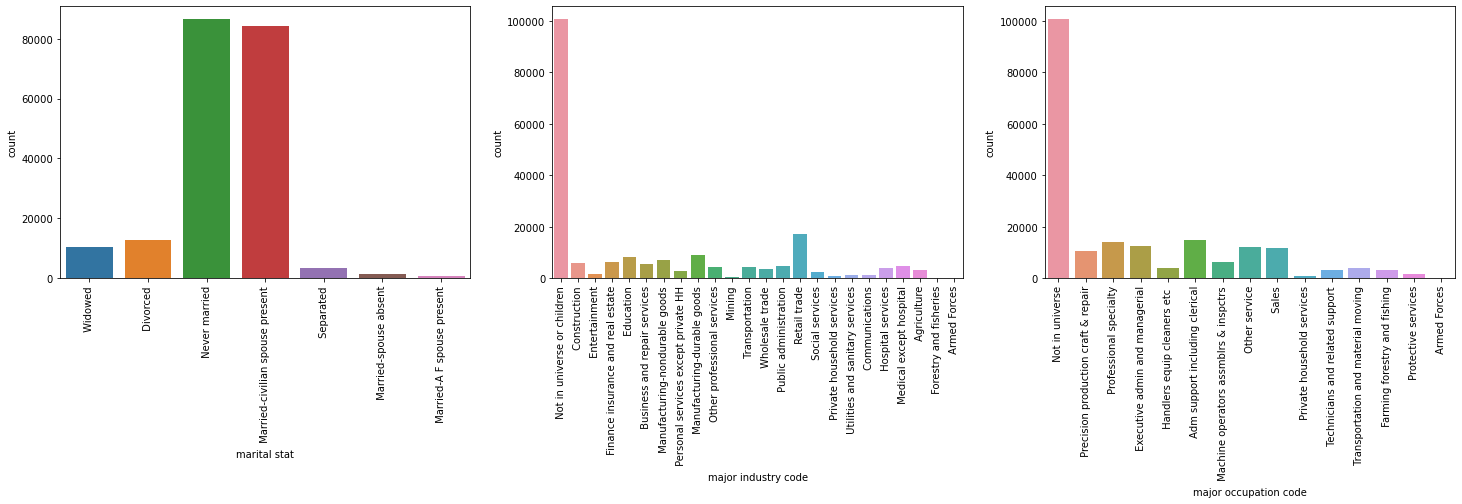

In [56]:
create_graph_cat(categorical_columns[3:6])

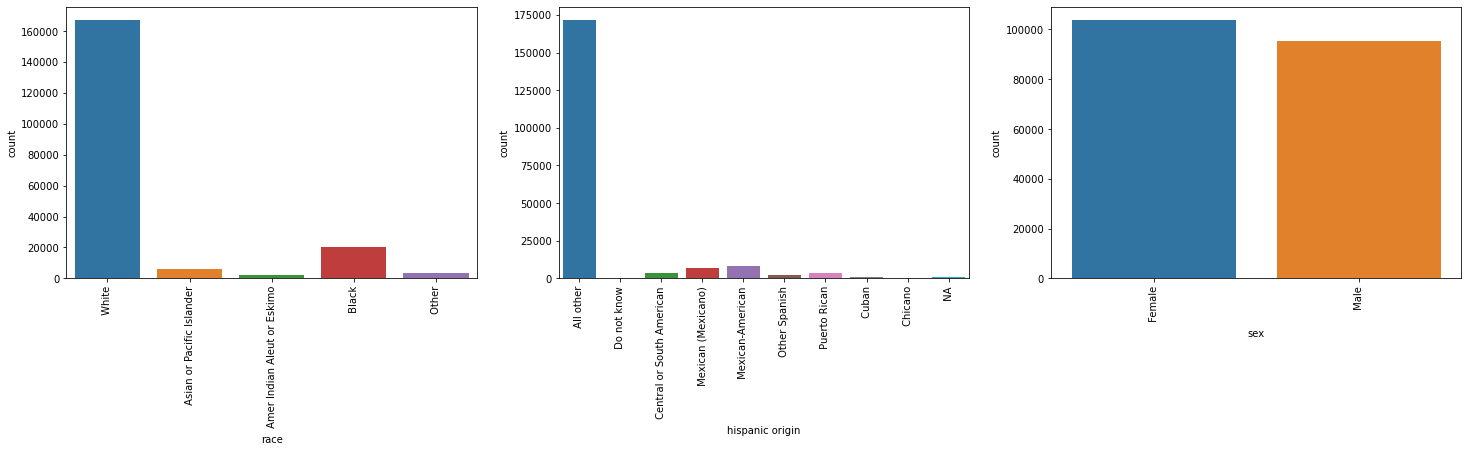

In [57]:
create_graph_cat(categorical_columns[6:9])

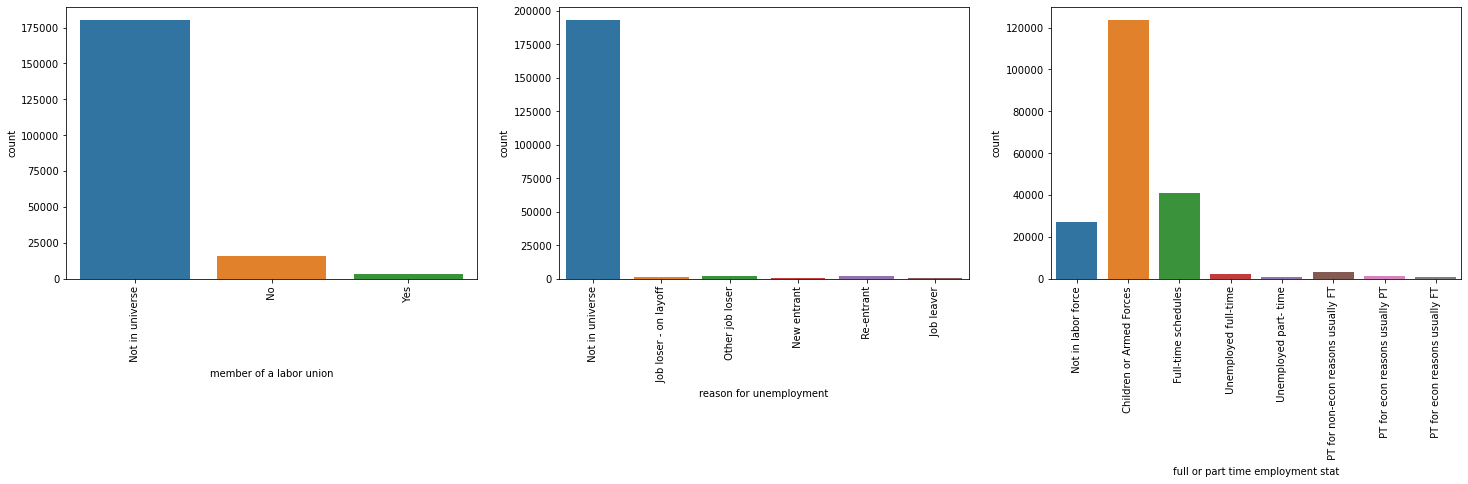

In [58]:
create_graph_cat(categorical_columns[9:12])

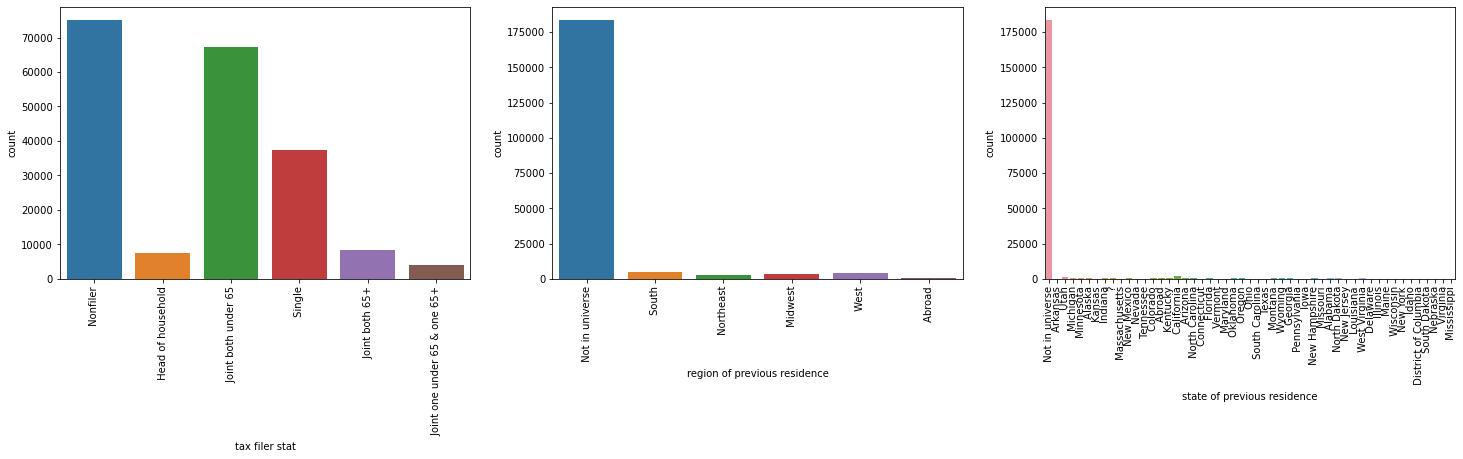

In [59]:
create_graph_cat(categorical_columns[12:15])

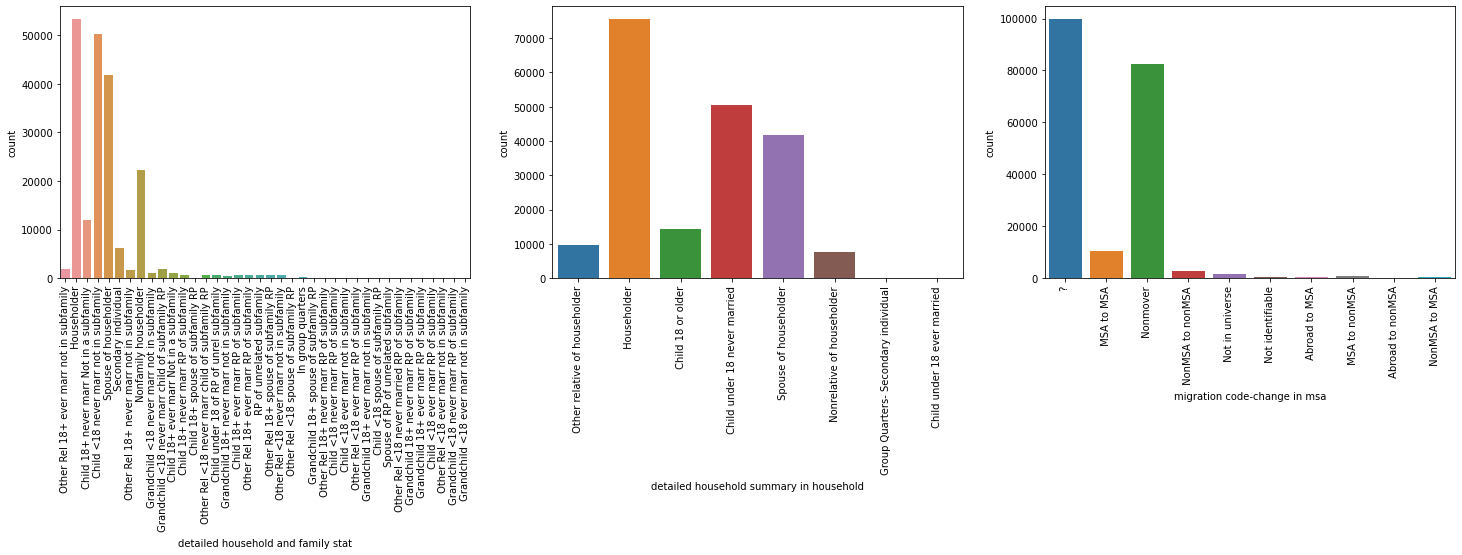

In [60]:
create_graph_cat(categorical_columns[15:18])

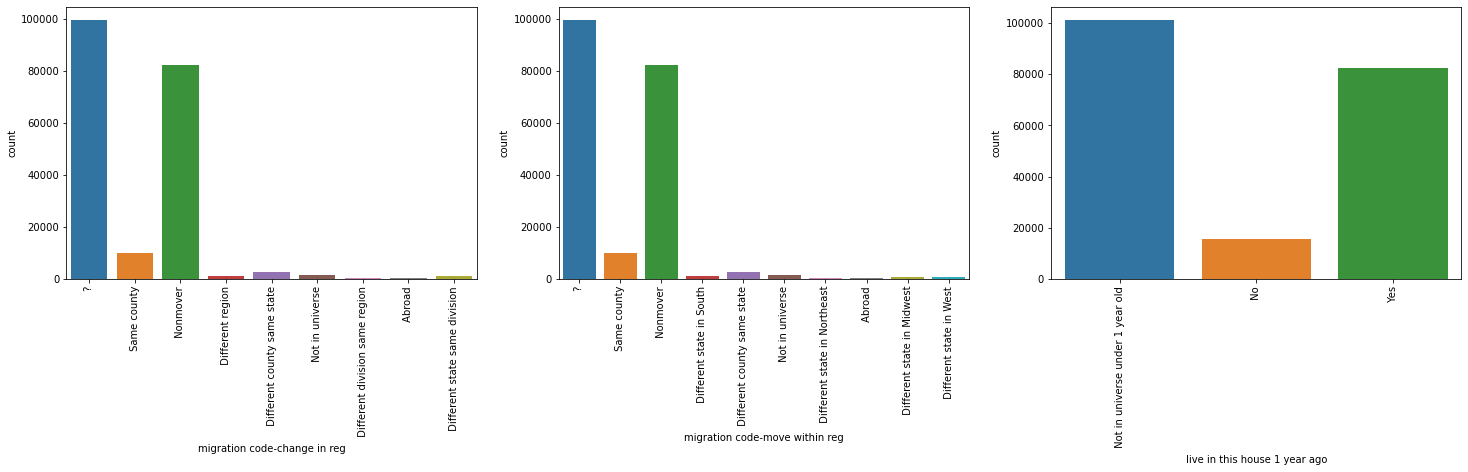

In [61]:
create_graph_cat(categorical_columns[18:21])

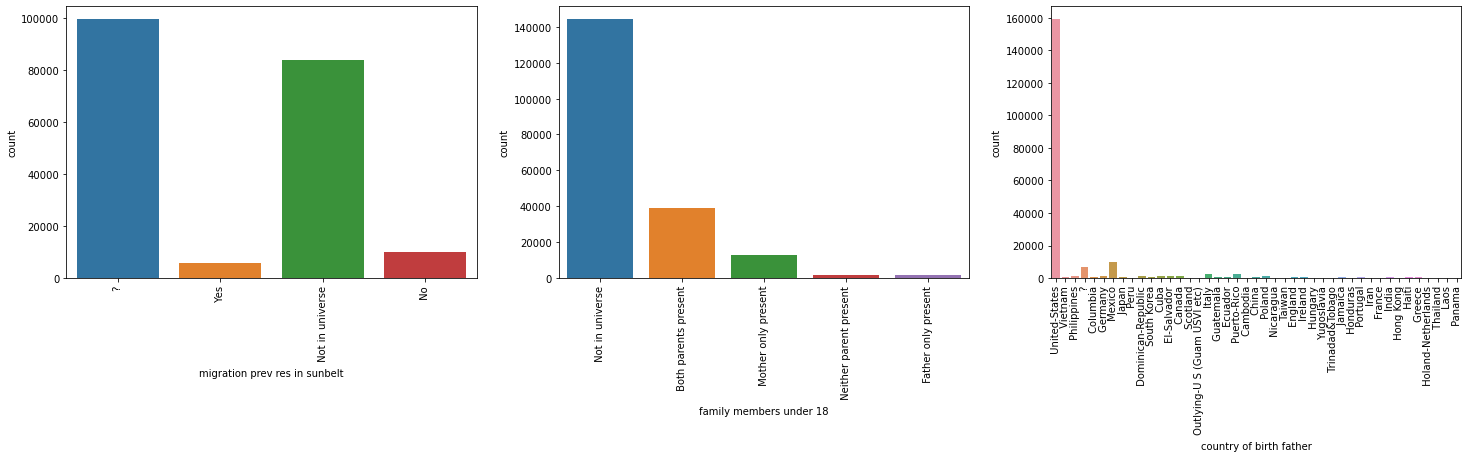

In [62]:
create_graph_(categorical_columns[21:24])

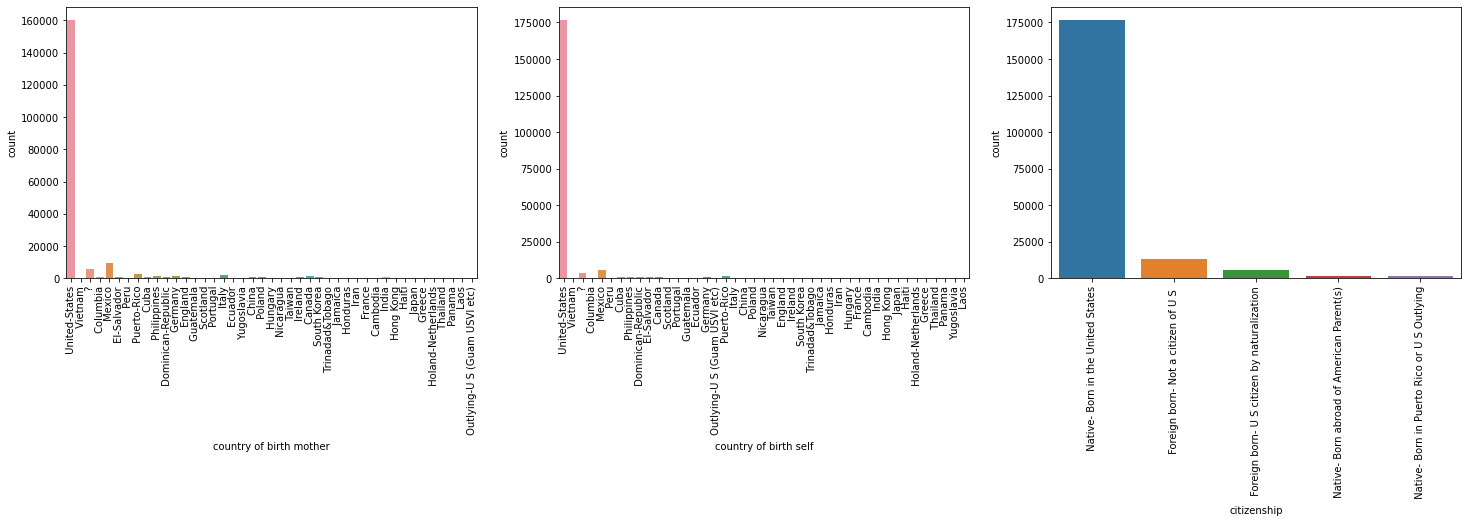

In [63]:
create_graph_cat(categorical_columns[24:27])

In [125]:
categorical_data.head(5)

,class of worker,education,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,...,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,fill inc questionnaire for veteran's admin
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,?,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,Same county,Same county,No,Yes,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
2,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,...,?,?,Not in universe under 1 year old,?,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,Not in universe
3,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Nonmover,Nonmover,Yes,Not in universe,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Nonmover,Nonmover,Yes,Not in universe,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe


In [28]:
import h2o
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,5 hours 2 mins
H2O_cluster_timezone:,America/Denver
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.1
H2O_cluster_version_age:,1 month and 19 days
H2O_cluster_name:,rdangol
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.320 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [12]:
from h2o.automl import H2OAutoML

# Import a sample binary outcome train/test set into H2O
train = h2o.H2OFrame(df)
test = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [13]:

# Identify predictors and response
x = train.columns
y = "target"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, 
                seed=1)
aml.train(x=x, 
          y=y, 
          training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  #

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_3_AutoML_20200926_232940,0.953396,0.112335,0.678534,0.20327,0.179631,0.0322673
XGBoost_grid__1_AutoML_20200926_232940_model_4,0.953279,0.112251,0.679616,0.209106,0.179454,0.0322038
StackedEnsemble_AllModels_AutoML_20200926_232940,0.953066,0.125048,0.680789,0.201092,0.182657,0.0333635
XGBoost_grid__1_AutoML_20200926_232940_model_3,0.952891,0.113063,0.674158,0.206398,0.18024,0.0324866
StackedEnsemble_BestOfFamily_AutoML_20200926_232940,0.952484,0.125773,0.678844,0.202047,0.18311,0.0335292
XGBoost_grid__1_AutoML_20200926_232940_model_1,0.952338,0.113651,0.671196,0.208365,0.18073,0.0326634
GBM_2_AutoML_20200926_232940,0.952329,0.113549,0.675642,0.205243,0.180331,0.0325191
GBM_3_AutoML_20200926_232940,0.952308,0.113888,0.673353,0.203548,0.180641,0.0326311
GBM_1_AutoML_20200926_232940,0.951724,0.114913,0.664357,0.199353,0.181044,0.0327771
GBM_5_AutoML_20200926_232940,0.951596,0.114551,0.670697,0.20929,0.181078,0.0327894


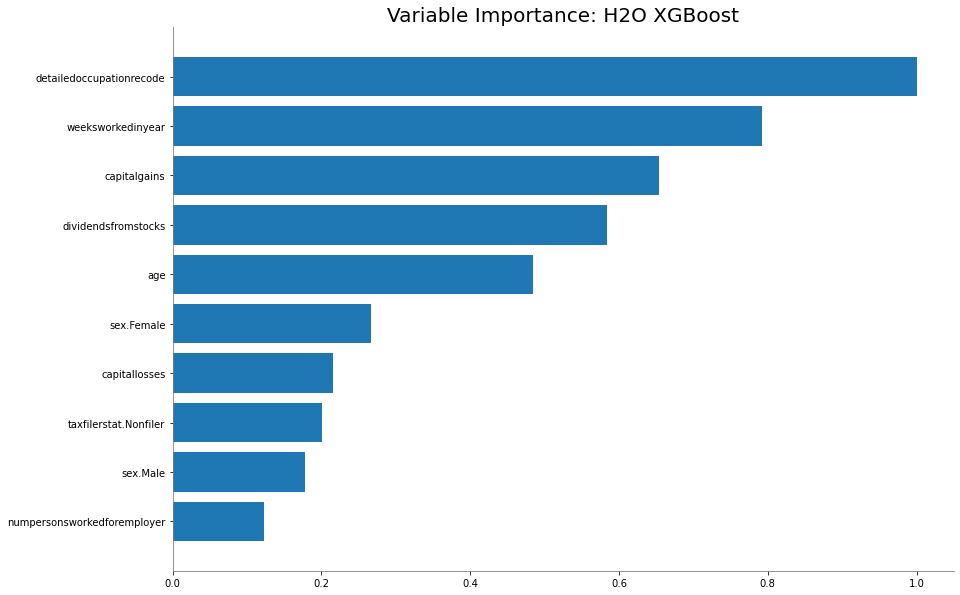

In [28]:
aml.leader.varimp_plot()

In [18]:
#preds = aml.predict(test)

# or:
preds = aml.leader.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%


In [29]:
preds.head(5)

predict,p0,p1
0,0.998318,0.00168206
0,0.976815,0.023185
0,0.999978,2.20868e-05
0,0.956077,0.0439235
0,0.933275,0.0667245


## Steps taken to clean the data:

In [140]:
df['country of birth self'].unique()

array([' United-States', ' Vietnam', ' ?', ' Columbia', ' Mexico',
       ' Peru', ' Cuba', ' Philippines', ' Dominican-Republic',
       ' El-Salvador', ' Canada', ' Scotland', ' Portugal', ' Guatemala',
       ' Ecuador', ' Germany', ' Outlying-U S (Guam USVI etc)',
       ' Puerto-Rico', ' Italy', ' China', ' Poland', ' Nicaragua',
       ' Taiwan', ' England', ' Ireland', ' South Korea',
       ' Trinadad&Tobago', ' Jamaica', ' Honduras', ' Iran', ' Hungary',
       ' France', ' Cambodia', ' India', ' Hong Kong', ' Japan', ' Haiti',
       ' Holand-Netherlands', ' Greece', ' Thailand', ' Panama',
       ' Yugoslavia', ' Laos'], dtype=object)

In [30]:
df.target.value_counts()

0    187141
1     12382
Name: target, dtype: int64

In [141]:
df.head(5)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
